In [25]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

In [26]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [27]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 1 & S1/'

In [28]:
bc_state = pd.read_csv(file_path + 'barcode_states_BC2.csv')
bc_state

,No,cell_line,barcode,editd positions,edit ratio
0,0,41,000000000000',0,0.000000
1,1,42,100000000000',1,0.083333
2,2,62,000000000001',1,0.083333
3,3,43,110000000000',2,0.166667
4,4,76,000000000011',2,0.166667
5,5,44,111000000000',3,0.250000
6,6,77,000000000111',3,0.250000
7,7,45,111100000000',4,0.333333
8,8,59,000100001110',4,0.333333
9,9,78,000000001111',4,0.333333


# The Maximum intensity projected(max) and segemented masks(mask) for each channel used for following intensity measurement

        path_DAPImask = data_dir + 'ch3_mask_GPU/' + re.split('/', f)[-1][0:-4] + '_ch3_cp_masks.png'
        path_647mask = data_dir + 'ch1_mask_v2/' + re.split('/', f)[-1][0:-4] + '_ch1_Probabilities.tif'
        path_546mask = data_dir + 'ch2_mask_v2/' + re.split('/', f)[-1][0:-4] + '_ch2_Probabilities.tif'

        path_DAPImax = data_dir + 'SmartMax_v2/' + re.split('/', f)[-1][0:-4] + '_ch3.tif'
        path_546max = data_dir + 'SmartMax_v2/' + re.split('/', f)[-1][0:-4] + '_ch2_rolling_50.tif'
        path_647max = data_dir + 'SmartMax_v2/' + re.split('/', f)[-1][0:-4] + '_ch1_rolling_50.tif'

In [29]:
cleaned_df = pd.read_csv(data_path + 'synthetic_BC2.csv')
cleaned_df

,label,area,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity_647,mean_intensity_546,...,barcode,editd positions,edit ratio,intensity_647,intensity_546,int_ratio,int_diff,width,height,mout avg
0,1,54.0,44.518519,411.370370,41,408,49,416,9805.703704,34.074074,...,000000000000',0,0.000000,13.179704,7.517521,0.570386,-8.168803,8,8,0.094574
1,2,28.0,45.214286,1002.142857,43,1000,49,1006,9523.285714,76.428571,...,000000000000',0,0.000000,12.493700,7.668561,0.613794,-6.961204,6,6,0.056264
2,3,13.0,48.615385,334.384615,47,333,51,337,10872.461538,57.000000,...,000000000000',0,0.000000,11.858938,6.608001,0.557217,-7.575501,4,4,0.047750
3,5,10.0,64.200000,1757.500000,63,1756,66,1760,10601.300000,43.800000,...,000000000000',0,0.000000,11.571317,6.082219,0.525629,-7.919095,3,4,0.088282
4,6,4.0,81.250000,1809.500000,80,1809,83,1811,9810.500000,78.750000,...,000000000000',0,0.000000,10.577503,5.752573,0.543850,-6.960903,3,2,0.056814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36871,248,6.0,2019.000000,7.500000,2018,7,2021,9,312.333333,2039.000000,...,011111111111',11,0.916667,7.535830,9.411974,1.248963,2.706703,3,2,11.963508
36872,249,20.0,2024.700000,17.100000,2023,15,2028,20,509.500000,2216.700000,...,011111111111',11,0.916667,9.229162,10.699507,1.159315,2.121259,5,5,11.809921
36873,250,59.0,2039.406780,1596.627119,2035,1593,2045,1601,515.322034,3977.864407,...,011111111111',11,0.916667,10.322329,12.366038,1.197989,2.948448,10,8,11.143475
36874,251,46.0,2043.413043,872.000000,2040,868,2048,876,1014.391304,3634.217391,...,011111111111',11,0.916667,10.750685,12.026790,1.118700,1.841030,8,8,10.702511


In [30]:
total_barcode_counts = cleaned_df.groupby('editd positions', as_index=False)['barcode_number'].sum()
total_barcode_counts

,editd positions,barcode_number
0,0,895
1,1,1505
2,2,1813
3,3,1896
4,4,2036
5,5,4909
6,6,3479
7,7,2736
8,8,4269
9,9,5524


In [31]:
total_barcode_counts = cleaned_df.groupby('No', as_index=False)['barcode_number'].sum()
total_barcode_counts

,No,barcode_number
0,0,895
1,1,846
2,2,659
3,3,1351
4,4,462
5,5,1330
6,6,566
7,7,782
8,8,445
9,9,809


In [14]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig. S1B
Grouped all the barcode arrays with the same number of edits 

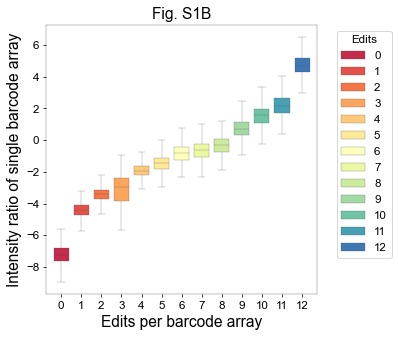

In [24]:
# single barcode array analysis
import os
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

temp_df = cleaned_df.copy()

color_palette = sns.color_palette("Spectral", n_colors=13)

plt.figure(figsize=(5, 5), dpi=70)
sns.boxplot(x='editd positions', 
            y='int_diff',
            hue='editd positions', 
            data=temp_df,
            palette=color_palette,
            linewidth=0.25,
            saturation=1,
            #whis=1,
            width=0.75,
            showfliers=False)

plt.xlabel('Edits per barcode array')
plt.ylabel('Intensity ratio of single barcode array')
plt.title('Fig. S1B')
plt.legend(title='Edits', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().margins(x=0.03)
#sns.despine()
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
#plt.ylim([-7, 6.5])
# Specify the save path
#save_path = os.path.join(data_dir, '221107_syn_BC3_intensity diff of barcode array for each edits status.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
#plt.savefig('221120_syn_BC8_intensity Ratio of barcode array for each edits status.svg', dpi=300, format='svg', transparent=True)
plt.show()


# Fig. S1C

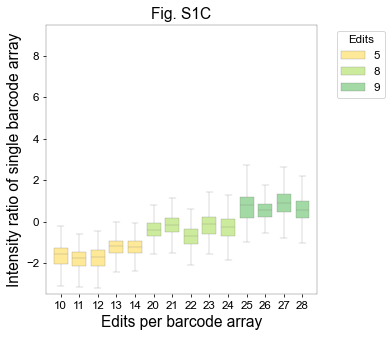

In [23]:
# Filter the DataFrame
positions = [5, 8, 9]

color_palette=sns.color_palette("Spectral", n_colors=13)

# Create a custom palette with colors for edited positions
custom_palette = [color_palette[i] for i in positions]

#color_palette=sns.color_palette("Spectral", n_colors=4)

temp_df = cleaned_df[cleaned_df['editd positions'].isin(positions)].copy()

# Create the plot
plt.figure(figsize=(5, 5), dpi=70)
sns.boxplot(x='No', 
            y='int_diff',
            hue='editd positions', 
            data=temp_df,
            palette=custom_palette,
            linewidth=0.25,  # Set the width of the violin plots
            saturation=1,
            width=0.75,
            showfliers=False)  # Do not show outliers)

plt.xlabel('Edits per barcode array')
plt.ylabel('Intensity ratio of single barcode array')
plt.title('Fig. S1C')
plt.legend(title='Edits', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim([-3.5, 9.5])
plt.gca().margins(x=0.03)
#sns.despine()
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
#save_path = os.path.join(data_dir, '221107_syn_BC3_Intensity Ratio of barcode array for edits 5, 8, 9.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
#plt.savefig('221120_syn_BC8_Intensity Ratio of barcode array for edits 5, 6, 8, 9.svg', dpi=300, format='svg', transparent=True)
plt.show()